# SETUP

## IMPORT LIBRARIES

In [ ]:
# import libraries
from google.colab import files
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [ ]:
# autokeras
!pip install autokeras
import autokeras as ak

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 27.6 MB/s eta 0:00:00


In [ ]:
#!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
# don't know if need - added during process of trying to get additional metrics - did not work

In [ ]:
!pip install keras
import keras as keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## LOAD DATAFILES

In [ ]:
# load Cleveland datafile
cleveland_csv_path = "processed.cleveland.data"
cleveland_data = pd.read_csv(cleveland_csv_path, header = None)
# assign column names
cleveland_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'], axis = 1, inplace = True)

<ipython-input-5-f9b1f45b3555>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cleveland_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',


In [ ]:
# load Hungarian datafile
hungarian_csv_path = "reprocessed.hungarian.data"
hungarian_data = pd.read_csv(hungarian_csv_path, delimiter = ' ', header = None)
# assign column names
hungarian_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'], axis = 1, inplace = True)

<ipython-input-6-682e5198959a>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  hungarian_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',


In [ ]:
# load Switzerland datafile
switzerland_csv_path = "processed.switzerland.data"
switzerland_data = pd.read_csv(switzerland_csv_path, header = None)
# assign column names
switzerland_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'], axis = 1, inplace = True)

<ipython-input-7-5091b7e6b8f1>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  switzerland_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',


In [ ]:
# load VA datafile
va_csv_path = "processed.va.data"
va_data = pd.read_csv(va_csv_path, header = None)
# assign column names
va_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'], axis = 1, inplace = True)

<ipython-input-8-d85eae1a383b>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  va_data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',


## DEFINE LABEL COLUMN

In [ ]:
# Define label column
heart_label = 'num'

# CLEVELAND

## SIMPLEST OF MODELS
zero data preprocessing performed

### TAKE A PEEK

In [ ]:
cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
cleveland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### BINARY MODELING
(Note: "Cleveland" label here would need to be revised because used in Slightly Better Model below when split the data, if care.)

#### PREPARE DATA

In [ ]:
# make copy for binary labeling
cleveland_binary = cleveland_data.copy()
cleveland_binary['num'][cleveland_binary['num'] > 0] = 1
cleveland_binary.head()

<ipython-input-82-100db5bdd73b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleveland_binary['num'][cleveland_binary['num'] > 0] = 1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# split the binary data
from sklearn.model_selection import train_test_split
cleveland_train, cleveland_test = train_test_split(cleveland_binary, test_size=0.2, random_state=42)
cleveland_test_labels = cleveland_test[heart_label]
cleveland_test_nolabel = cleveland_test.drop([heart_label], axis=1)
cleveland_train_labels = cleveland_train[heart_label]
cleveland_train_nolabel = cleveland_train.drop([heart_label], axis=1)
cleveland_train.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,67.0,1.0,4.0,100.0,299.0,0.0,2.0,125.0,1.0,0.9,2.0,2.0,3.0,1
162,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
230,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0
52,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,1
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0


#### MODEL - TRAIN & EVALUATE

In [ ]:
# Instantiate classifier
clf = ak.StructuredDataClassifier(overwrite=True, max_trials = 3)

In [ ]:
# Fit model
clf.fit(cleveland_train_nolabel, cleveland_train_labels)

In [ ]:
# Predict with best model
cleveland_pred_y = clf.predict(cleveland_test_nolabel)

In [ ]:
# Evaluate best model with testing data
print(clf.evaluate(cleveland_test_nolabel, cleveland_test_labels))
# loss: 0.4278 & accuracy: 0.8689 with max_trials=3 & epochs=10 (elapsed time = 14s; one run took as long as 1m 24s)
#       but rerunning may produce drastically different results (i.e. 0.8033)
#       too few trials and epochs; too much "luck of the draw" (not likely ... see default settings notes)
# default settings (100 max_trials, 1000 epochs) (39m 9s)
# loss: 0.3654 & accuracy: 0.8361
#       comparable/same accuracies as was getting with very simple version
#       no reason to run model for 39m when get similar results in 14s

2/2 [==============================] - 0s 6ms/step - loss: 0.3567 - accuracy: 0.8361
[0.35674744844436646, 0.8360655903816223]


#### TABLES, PLOTS, AND SUCH

In [ ]:
# confusion matrix
confusion_matrix(cleveland_test_labels, cleveland_pred_y)

array([[26,  3],
       [ 7, 25]])

### MULTICLASS MODELING

(only ~50% accuracy so far!)


Future research thought: Multiclass classification. OneVsAll for have:don't have heart disease and then Mutliclass for specific type/severity of heart disease may be more effective.

In [ ]:
cleveland_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# split the multiclass data
from sklearn.model_selection import train_test_split
mccleveland_train, mccleveland_test = train_test_split(cleveland_data, test_size=0.2, random_state=42)
mccleveland_test_labels = mccleveland_test[heart_label]
mccleveland_test_nolabel = mccleveland_test.drop([heart_label], axis=1)
mccleveland_train_labels = mccleveland_train[heart_label]
mccleveland_train_nolabel = mccleveland_train.drop([heart_label], axis=1)
mccleveland_train.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
156,51.0,1.0,4.0,140.0,299.0,0.0,0.0,173.0,1.0,1.6,1.0,0.0,7.0,1
291,55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0
108,61.0,1.0,4.0,120.0,260.0,0.0,0.0,140.0,1.0,3.6,2.0,1.0,7.0,2
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3


In [ ]:
# Instantiate classifier
mcclf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)

In [ ]:
# Fit model
mcclf.fit(mccleveland_train_nolabel, mccleveland_train_labels)

Trial 3 Complete [00h 00m 09s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.7222222089767456
Total elapsed time: 00h 00m 22s
Epoch 1/6
8/8 [==============================] - 1s 4ms/step - loss: 1.4720 - accuracy: 0.4628
Epoch 2/6
8/8 [==============================] - 0s 2ms/step - loss: 1.3421 - accuracy: 0.5413
Epoch 3/6
8/8 [==============================] - 0s 3ms/step - loss: 1.2397 - accuracy: 0.5620
Epoch 4/6
8/8 [==============================] - 0s 3ms/step - loss: 1.1606 - accuracy: 0.5785
Epoch 5/6
8/8 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.5744
Epoch 6/6
8/8 [==============================] - 0s 2ms/step - loss: 1.0589 - accuracy: 0.5868


In [ ]:
# Predict with best model
mccleveland_pred_y = clf.predict(mccleveland_test_nolabel)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Evaluate best model with testing data
print(mcclf.evaluate(mccleveland_test_nolabel, mccleveland_test_labels))

# loss: 1.2442 & accuracy: 0.5082 ... !!!!!!!!!!!
# May be best to stick with binary label, like everyone else has previously.

2/2 [==============================] - 0s 8ms/step - loss: 1.2090 - accuracy: 0.4918
[1.2090299129486084, 0.49180328845977783]


In [ ]:
# confusion matrix
#from sklearn.metrics import classification_report, confusion_matrix
#confusion_matrix(mccleveland_test_labels, mccleveland_pred_y)

# ERROR WHEN TRY TO RUN THIS CONFUSION MATRIX

## SLIGHTLY BETTER MODEL
no missing values & stratified sampling

### DATA PREPROCESSING

#### MISSING VALUES

In [ ]:
# make copy of original dataframe
cleveland = cleveland_data.copy()

In [ ]:
# check for missing values
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# replace '?' values with NaN so can impute
cleveland['thal'].replace('?', np.NaN, inplace=True)
cleveland['thal'] = cleveland['thal'].astype(float)
cleveland['ca'].replace('?', np.NaN, inplace=True)
cleveland['ca'] = cleveland['ca'].astype(float)
cleveland.tail() # to verify didn't mess up dataframe IDs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [ ]:
# make dataset version for plotting purposes
cleveland_for_plot = cleveland.copy()

In [ ]:
# impute with mode as 'thal' and 'ca' (attributes w/ missing values) are discrete
imputeMode = SimpleImputer(strategy="most_frequent") # create mode imputer
imputeMode.fit(cleveland) # fit - learns the data
imputed = imputeMode.transform(cleveland) # transform - imputes with chosen strategy
cleveland = pd.DataFrame(imputed, columns=cleveland.columns, index=cleveland.index) # back to pandas DataFrame
cleveland.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
cleveland.head() # check for anything obviously wonky

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


#### BINARY LABEL
(multiclass for "future research")

In [ ]:
cleveland['num'][cleveland['num'] > 0] = 1
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


#### STRATIFIED SAMPLING

(due to difference in sex representation)

In [ ]:
cleveland_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in cleveland_strat.split(cleveland, cleveland["num"]):
  cleveland_strat_train = cleveland.loc[train_index]
  cleveland_strat_test = cleveland.loc[test_index]

In [ ]:
cleveland_strat_test["num"].value_counts()/len(cleveland_strat_test)

0.0    0.540984
1.0    0.459016
Name: num, dtype: float64

In [ ]:
cleveland_strat_train["num"].value_counts()/len(cleveland_strat_train)

0.0    0.541322
1.0    0.458678
Name: num, dtype: float64

Less significant for Cleveland and Statlog datasets, which have less dramatic difference in sex representation in data, but different for other three datasets. 

In [ ]:
# split stratified data
cleveland_strat_train_X = cleveland_strat_train.drop([heart_label], axis=1)
cleveland_strat_train_y = cleveland_strat_train[heart_label]
cleveland_strat_test_X = cleveland_strat_test.drop([heart_label], axis=1)
cleveland_strat_test_y = cleveland_strat_test[heart_label]
cleveland_strat_train_X.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
136,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0
265,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
200,50.0,0.0,4.0,110.0,254.0,0.0,2.0,159.0,0.0,0.0,1.0,0.0,3.0
77,51.0,0.0,3.0,140.0,308.0,0.0,2.0,142.0,0.0,1.5,1.0,1.0,3.0


### BINARY MODEL

In [ ]:
clev_clf = ak.StructuredDataClassifier(overwrite=True, seed = 42) # instantiate classifier
clev_clf.fit(cleveland_strat_train_X, cleveland_strat_train_y) # fit model

Trial 100 Complete [00h 00m 06s]
val_accuracy: 0.7222222089767456

Best val_accuracy So Far: 0.9444444179534912
Total elapsed time: 00h 09m 42s
Epoch 1/3
8/8 [==============================] - 1s 4ms/step - loss: 4.1682 - accuracy: 0.6942
Epoch 2/3
8/8 [==============================] - 0s 3ms/step - loss: 0.7542 - accuracy: 0.7438
Epoch 3/3
8/8 [==============================] - 0s 3ms/step - loss: 0.8768 - accuracy: 0.7686


In [ ]:
cleveland_strat_pred_y = clev_clf.predict(cleveland_strat_test_X) # predict with best model
print(clev_clf.evaluate(cleveland_strat_test_X, cleveland_strat_test_y)) # evaluate best model with testing data
# pretty much same accuracy achieved as before removing missing values, but makes sense to do so regardless
# (missing values removed only)
# (   accuracies w/ max_trials=3 & default epochs: 0.8525, 0.8852, 0.8689)
# (also stratified sampling by sex)
# (   accuracies w/ max_trials=3 & default epochs: 0.7377, 0.8689)
# (   accuracies w/ max_trials=10 & default epochs: 0.6066 (1m 3s), 0.8852 (58s))
# (   accuracies w/ max_trials=100 & default epochs: 0.8689 (13m 25s))
# default settings 03/24 run - accuracy 0.5902 and run time 17m 49s - NOT CONFIDENT THIS ACCURACY NOT A TYPO AND ACTUALLY LOSS VALUE

# default settings 04/09 run - accuracy 0.8033 and run time 6m 35s

# FOR F1 SCORE
# default settings 04/16 run1 - accuracy 0.8033 and run time 9m 42s 

2/2 [==============================] - 0s 10ms/step - loss: 1.9966 - accuracy: 0.8033
[1.9965647459030151, 0.8032786846160889]


In [ ]:
# view model parameters
clev_model_0416r1 = clev_clf.export_model()
clev_model_0416r1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 13)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1024)              33792 

In [ ]:
#keras.metrics.AUC(curve="ROC")

# grrr... still struggling getting any additional metrics from autokeras or keras

In [ ]:
# save confusion matrix
clev_0416_r1 = confusion_matrix(cleveland_strat_test_y, cleveland_strat_pred_y)

In [ ]:
# show confusion matrix
clev_0416_r1

array([[22, 11],
       [ 1, 27]])

In [ ]:
# compute f1 score
import sklearn

In [ ]:
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(cleveland_strat_test_y, cleveland_strat_pred_y)

0.8181818181818182

### BINARY WITH F1
having trouble getting f1 to work for autokeras (I don't seem to be alone) ... 
going to resort to manual calculation

In [ ]:
#def f1_score(cleveland_strat_test_y, cleveland_strat_pred_y):
#  ...

In [ ]:
#clev_f1_clf = ak.StructuredDataClassifier(
#    overwrite=True, seed=42,

    # Wrap the function into a Keras Tuner Objective 
    # and pass it to AutoKeras.

    # Direction can be 'min' or 'max'
    # meaning we want to minimize or maximize the metric.

    # 'val_f1_score' is just add a 'val_' prefix
    # to the function name or the metric name.

#    objective=kerastuner.Objective('val_f1_score', direction='max'),
    # Include it as one of the metrics.
#    metrics=[f1_score],
#)

In [ ]:
#cleveland_f1_y = clev_f1_clf.predict(cleveland_strat_test_X) # predict with best model
#print(clev_f1_clf.evaluate(cleveland_strat_test_X, cleveland_strat_test_y)) # evaluate best model with testing data

## REDUCED FOR CORRELATION
(incl. no missing values & stratified sampling)

### DATA PREPROCESSING

#### REMOVE UNCORRELATED ATTRIBUTES

In [ ]:
# check correlation
cleveland_correlation = cleveland.corr()
cleveland_correlation['num'].sort_values()

thalach    -0.417167
fbs         0.025264
chol        0.085164
trestbps    0.150825
restecg     0.169202
age         0.223120
sex         0.276816
slope       0.339213
cp          0.414446
oldpeak     0.424510
exang       0.431894
ca          0.460033
thal        0.522057
num         1.000000
Name: num, dtype: float64

In [ ]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
# eliminate columns with correlation less than abs(0.2)
drop_columns = ['fbs', 'chol', 'trestbps', 'restecg']
cleveland_downsized = cleveland.drop(columns = drop_columns)
cleveland_downsized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   thalach  303 non-null    float64
 4   exang    303 non-null    float64
 5   oldpeak  303 non-null    float64
 6   slope    303 non-null    float64
 7   ca       303 non-null    float64
 8   thal     303 non-null    float64
 9   num      303 non-null    float64
dtypes: float64(10)
memory usage: 23.8 KB


#### STRATIFIED SPLIT OF DATA

In [ ]:
cleveland_downsized_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in cleveland_downsized_strat.split(cleveland_downsized, cleveland_downsized["num"]):
  cleveland_downsized_strat_train = cleveland_downsized.loc[train_index]
  cleveland_downsized_strat_test = cleveland_downsized.loc[test_index]

In [ ]:
cleveland_downsized_strat_test["num"].value_counts()/len(cleveland_downsized_strat_test)

0.0    0.540984
1.0    0.459016
Name: num, dtype: float64

In [ ]:
cleveland_downsized_strat_train["num"].value_counts()/len(cleveland_downsized_strat_train)

0.0    0.541322
1.0    0.458678
Name: num, dtype: float64

In [ ]:
# split stratified data
cleveland_downsized_strat_train_X = cleveland_downsized_strat_train.drop([heart_label], axis=1)
cleveland_downsized_strat_train_y = cleveland_downsized_strat_train[heart_label]
cleveland_downsized_strat_test_X = cleveland_downsized_strat_test.drop([heart_label], axis=1)
cleveland_downsized_strat_test_y = cleveland_downsized_strat_test[heart_label]
cleveland_downsized_strat_train_X.sample(5)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
151,42.0,0.0,4.0,122.0,0.0,0.6,2.0,0.0,3.0
58,54.0,1.0,3.0,152.0,0.0,0.5,3.0,1.0,3.0
52,44.0,1.0,4.0,153.0,0.0,0.0,1.0,1.0,3.0
59,51.0,1.0,1.0,125.0,1.0,1.4,1.0,1.0,3.0
129,62.0,0.0,4.0,163.0,0.0,0.0,1.0,0.0,3.0


### BINARY MODELING

In [ ]:
clev_corr_clf = ak.StructuredDataClassifier(overwrite=True, seed=42) # instantiate classifier
clev_corr_clf.fit(cleveland_downsized_strat_train_X, cleveland_downsized_strat_train_y) # fit model

Trial 94 Complete [00h 00m 05s]
val_accuracy: 0.7222222089767456

Best val_accuracy So Far: 0.9444444179534912
Total elapsed time: 00h 16m 22s
Epoch 1/33
8/8 [==============================] - 2s 7ms/step - loss: 4.1659 - accuracy: 0.5909
Epoch 2/33
8/8 [==============================] - 0s 6ms/step - loss: 4.9297 - accuracy: 0.6322
Epoch 3/33
8/8 [==============================] - 0s 5ms/step - loss: 5.3367 - accuracy: 0.5579
Epoch 4/33
8/8 [==============================] - 0s 6ms/step - loss: 3.4798 - accuracy: 0.6777
Epoch 5/33
8/8 [==============================] - 0s 6ms/step - loss: 3.7968 - accuracy: 0.5992
Epoch 6/33
8/8 [==============================] - 0s 6ms/step - loss: 3.3147 - accuracy: 0.6116
Epoch 7/33
8/8 [==============================] - 0s 5ms/step - loss: 2.9192 - accuracy: 0.7066
Epoch 8/33
8/8 [==============================] - 0s 6ms/step - loss: 1.6674 - accuracy: 0.6694
Epoch 9/33
8/8 [==============================] - 0s 6ms/step - loss: 2.0432 - accuracy: 

In [ ]:
cleveland_downsized_strat_pred_y = clev_corr_clf.predict(cleveland_downsized_strat_test_X) # predict with best model
print(clev_corr_clf.evaluate(cleveland_downsized_strat_test_X, cleveland_downsized_strat_test_y)) # evaluate best model with testing data
# (accuracies w/ max_trials=3 & default epochs: 0.6066 (4m 7s), 0.8033 (13s))

2/2 [==============================] - 0s 8ms/step - loss: 1.4754 - accuracy: 0.5410
[1.475428581237793, 0.5409836173057556]


In [ ]:
# view model parameters
clev_corr_model = clev_corr_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 9)                0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 16)                160       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0     

In [ ]:
# compute F1 score
import sklearn
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(cleveland_downsized_strat_test_y, cleveland_downsized_strat_pred_y)

0.6666666666666666

# HUNGARIAN

## TAKE A PEEK

In [ ]:
hungarian_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [ ]:
hungarian_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  ca        294 non-null    float64
 12  thal      294 non-null    float64
 13  num       294 non-null    float64
dtypes: float64(14)
memory usage: 32.4 KB


## SIMPLEST OF MODELS - BINARY
(mininimal preprocessing)
CURRENTLY STRUGGLING WITH AN ERROR HERE

#### PREPARE DATA

In [ ]:
# make copy of original dataframe
hungarian_basic = hungarian_data.copy()

In [ ]:
# convert unknowns (-9.0) to NaN
hungarian_basic.replace(-9.0, np.NaN, inplace=True)

In [ ]:
# make copy for binary labeling
hungarian_basic['num'][hungarian_basic['num'] > 0] = 1
hungarian_basic.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,1.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
# try dropping slope, ca, and thal
hungarian_basic.drop(['slope', 'ca', 'thal', ], axis=1, inplace=True) # did not fix error

In [ ]:
# split the binary data
from sklearn.model_selection import train_test_split
hungarian_basic_train, hungarian_basic_test = train_test_split(hungarian_basic, test_size=0.2, random_state=42)
hungarian_basic_test_labels = hungarian_basic_test[heart_label]
hungarian_basic_test_nolabel = hungarian_basic_test.drop([heart_label], axis=1)
hungarian_basic_train_labels = hungarian_basic_train[heart_label]
hungarian_basic_train_nolabel = hungarian_basic_train.drop([heart_label], axis=1)
hungarian_basic_train.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
16,38.0,1.0,4.0,110.0,196.0,0.0,0.0,166.0,0.0,0.0,NaN,NaN,NaN,1.0
114,49.0,0.0,3.0,130.0,207.0,0.0,1.0,135.0,0.0,0.0,NaN,NaN,NaN,0.0
203,42.0,1.0,3.0,160.0,147.0,0.0,0.0,146.0,0.0,0.0,NaN,NaN,NaN,0.0
26,53.0,1.0,4.0,124.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,0.0
210,54.0,1.0,4.0,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1.0


In [ ]:
hungarian_basic_train_labels

97     0.0
63     1.0
17     0.0
215    1.0
219    0.0
      ... 
188    1.0
71     0.0
106    0.0
270    0.0
102    1.0
Name: num, Length: 236, dtype: float64

#### MODEL - TRAIN & EVALUATE

In [ ]:
clf = ak.StructuredDataClassifier(overwrite=True, seed=42) # Instantiate classifier
clf.fit(hungarian_basic_train_nolabel, hungarian_basic_train_labels) # Fit model

In [ ]:
# Predict with best model
hungarian_basic_pred_y = clf.predict(hungarian_basic_test_nolabel)
# Evaluate best model with testing data
print(clf.evaluate(hungarian_basic_test_nolabel, hungarian_basic_test_labels))

#### TABLES, PLOTS, AND SUCH

In [ ]:
# confusion matrix
#from sklearn.metrics import classification_report, confusion_matrix
#confusion_matrix(hungarian_basic_test_labels, hungarian_basic_pred_y)

## SLIGHTLY BETTER MODEL
no missing values & stratified sampling

### DATA PREPROCESSING

#### MISSING VALUES

In [ ]:
# make copy of original dataframe
hungarian = hungarian_data.copy()

In [ ]:
# convert unknowns (-9.0) to NaN
hungarian.replace(-9.0, np.NaN, inplace=True)

In [ ]:
# check for missing values
hungarian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    float64
dtypes: float64(14)
memory usage: 32.4 KB


In [ ]:
# make dataset version for plotting purposes
hungarian_for_plot = hungarian.copy()

In [ ]:
# drop slope, ca, and thal due to >50% of values missing
hungarian.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)

In [ ]:
hungarian.tail() # check if next code block is needed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,0.0
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hungarian.drop(294,axis=0, inplace=True) # may not be necessary later # something may have gone wrong earlier, requiring it now

In [ ]:
from sklearn.impute import SimpleImputer
# impute discrete values using mode ()
imputeMode = SimpleImputer(strategy="most_frequent") # create mode imputer
hungarian_disc = pd.concat([hungarian.pop(x) for x in ['fbs', 'restecg', 'exang']], axis=1) # isolate discrete
imputeMode.fit(hungarian_disc) # fit - learns the data
imputed_disc = imputeMode.transform(hungarian_disc) # transform - imputes with chosen strategy
hungarian_disc_imp = pd.DataFrame(imputed_disc, columns=hungarian_disc.columns, index=hungarian.index) # back to pandas DataFrame
hungarian_disc_imp.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fbs      294 non-null    float64
 1   restecg  294 non-null    float64
 2   exang    294 non-null    float64
dtypes: float64(3)
memory usage: 7.0 KB


In [ ]:
# Combine cat, cont, and remaining
from sklearn.impute import SimpleImputer
# impute continuous values using mean
imputeMean = SimpleImputer(strategy="mean") # create mode imputer
hungarian_cont = pd.concat([hungarian.pop(x) for x in ['trestbps', 'chol', 'thalach']], axis=1) # isolate continuous
imputeMean.fit(hungarian_cont) # fit - learns the data
imputed_cont = imputeMean.transform(hungarian_cont) # transform - imputes with chosen strategy
hungarian_cont_imp = pd.DataFrame(imputed_cont, columns=hungarian_cont.columns, index=hungarian.index) # back to pandas DataFrame
hungarian_cont_imp.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  294 non-null    float64
 1   chol      294 non-null    float64
 2   thalach   294 non-null    float64
dtypes: float64(3)
memory usage: 7.0 KB


In [ ]:
hungarian_imp = pd.concat((hungarian_cont_imp, hungarian_disc_imp, hungarian), axis=1)

In [ ]:
hungarian_imp.head() # check for anything obviously wonky

,trestbps,chol,thalach,fbs,restecg,exang,age,sex,cp,oldpeak,num
0,140.0,289.000000,172.0,0.0,0.0,0.0,40.0,1.0,2.0,0.0,0.0
1,160.0,180.000000,156.0,0.0,0.0,0.0,49.0,0.0,3.0,1.0,1.0
2,130.0,283.000000,98.0,0.0,1.0,0.0,37.0,1.0,2.0,0.0,0.0
3,138.0,214.000000,108.0,0.0,0.0,1.0,48.0,0.0,4.0,1.5,3.0
4,150.0,250.848708,122.0,0.0,0.0,0.0,54.0,1.0,3.0,0.0,0.0


In [ ]:
hungarian_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  294 non-null    float64
 1   chol      294 non-null    float64
 2   thalach   294 non-null    float64
 3   fbs       294 non-null    float64
 4   restecg   294 non-null    float64
 5   exang     294 non-null    float64
 6   age       294 non-null    float64
 7   sex       294 non-null    float64
 8   cp        294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


#### BINARY LABEL
(multiclass for "future research")

In [ ]:
hungarian_imp['num'][hungarian_imp['num'] > 0] = 1
hungarian_imp.value_counts('num')

num
0.0    188
1.0    106
dtype: int64

#### STRATIFIED SAMPLING

(due to difference in sex representation)

In [ ]:
hungarian_imp_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in hungarian_imp_strat.split(hungarian_imp, hungarian_imp["num"]):
  hungarian_imp_strat_train = hungarian_imp.loc[train_index]
  hungarian_imp_strat_test = hungarian_imp.loc[test_index]

In [ ]:
hungarian_imp_strat_test["num"].value_counts()/len(hungarian_imp_strat_test)

0.0    0.644068
1.0    0.355932
Name: num, dtype: float64

In [ ]:
hungarian_imp_strat_train["num"].value_counts()/len(hungarian_imp_strat_train)

0.0    0.638298
1.0    0.361702
Name: num, dtype: float64

Less significant for Cleveland and Statlog datasets, which have less dramatic difference in sex representation in data, but different for other three datasets. 

In [ ]:
# split stratified data
hungarian_imp_strat_train_X = hungarian_imp_strat_train.drop([heart_label], axis=1)
hungarian_imp_strat_train_y = hungarian_imp_strat_train[heart_label]
hungarian_imp_strat_test_X = hungarian_imp_strat_test.drop([heart_label], axis=1)
hungarian_imp_strat_test_y = hungarian_imp_strat_test[heart_label]
hungarian_imp_strat_train_X.sample(5)

,trestbps,chol,thalach,fbs,restecg,exang,age,sex,cp,oldpeak
150,130.0,250.848708,120.0,0.0,0.0,0.0,39.0,1.0,2.0,0.0
138,140.0,250.848708,118.0,0.0,0.0,1.0,54.0,1.0,4.0,0.0
228,92.0,117.000000,134.0,0.0,0.0,1.0,38.0,1.0,4.0,2.5
101,130.0,179.000000,100.0,0.0,0.0,0.0,51.0,1.0,4.0,0.0
61,150.0,250.848708,175.0,0.0,0.0,0.0,43.0,0.0,3.0,0.0


### BINARY MODEL

In [ ]:
hung_clf = ak.StructuredDataClassifier(overwrite=True, seed = 42) # instantiate classifier
hung_clf.fit(hungarian_imp_strat_train_X, hungarian_imp_strat_train_y) # fit model

Trial 100 Complete [00h 00m 06s]
val_accuracy: 0.7272727489471436

Best val_accuracy So Far: 0.9090909361839294
Total elapsed time: 00h 14m 47s
8/8 [==============================] - 1s 5ms/step - loss: 0.6467 - accuracy: 0.6213


In [ ]:
hungarian_imp_strat_pred_y = hung_clf.predict(hungarian_imp_strat_test_X) # predict with best model
print(hung_clf.evaluate(hungarian_imp_strat_test_X, hungarian_imp_strat_test_y)) # evaluate best model with testing data
# default settings 03/27 run1 - accuracy 0.8644 and run time 7m 36s
# default settings 03/27 run2 - accuracy 0.7966 and run time 10m 29s
# default settings 03/27 run3 - accuracy 0.6610 and run time 52m 27s

2/2 [==============================] - 0s 7ms/step - loss: 0.5326 - accuracy: 0.8305
[0.5326333045959473, 0.8305084705352783]


In [ ]:
# view model parameters
model = hung_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 10)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
# compute F1 score
import sklearn
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(hungarian_imp_strat_test_y, hungarian_imp_strat_pred_y)

0.7058823529411765

## REDUCED FOR CORRELATION
(incl. no missing values & stratified sampling)

### DATA PREPROCESSING

#### REMOVE UNCORRELATED ATTRIBUTES

In [ ]:
# check correlation
hungarian_imp_correlation = hungarian_imp.corr()
hungarian_imp_correlation['num'].sort_values()

thalach    -0.331074
restecg    -0.031988
trestbps    0.139582
age         0.159315
fbs         0.162869
chol        0.202372
sex         0.272781
cp          0.505864
oldpeak     0.545700
exang       0.584541
num         1.000000
Name: num, dtype: float64

In [ ]:
hungarian_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  294 non-null    float64
 1   chol      294 non-null    float64
 2   thalach   294 non-null    float64
 3   fbs       294 non-null    float64
 4   restecg   294 non-null    float64
 5   exang     294 non-null    float64
 6   age       294 non-null    float64
 7   sex       294 non-null    float64
 8   cp        294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
# eliminate columns with correlation less than abs(0.2)
drop_columns = ['age', 'fbs', 'trestbps', 'restecg']
hungarian_imp_downsized = hungarian_imp.drop(columns = drop_columns)
hungarian_imp_downsized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   chol     294 non-null    float64
 1   thalach  294 non-null    float64
 2   exang    294 non-null    float64
 3   sex      294 non-null    float64
 4   cp       294 non-null    float64
 5   oldpeak  294 non-null    float64
 6   num      294 non-null    float64
dtypes: float64(7)
memory usage: 16.2 KB


#### STRATIFIED SPLIT OF DATA

In [ ]:
hungarian_imp_downsized_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in hungarian_imp_downsized_strat.split(hungarian_imp_downsized, hungarian_imp_downsized["num"]):
  hungarian_imp_downsized_strat_train = hungarian_imp_downsized.loc[train_index]
  hungarian_imp_downsized_strat_test = hungarian_imp_downsized.loc[test_index]

In [ ]:
hungarian_imp_downsized_strat_test["num"].value_counts()/len(hungarian_imp_downsized_strat_test)

0.0    0.644068
1.0    0.355932
Name: num, dtype: float64

In [ ]:
hungarian_imp_downsized_strat_train["num"].value_counts()/len(hungarian_imp_downsized_strat_train)

0.0    0.638298
1.0    0.361702
Name: num, dtype: float64

In [ ]:
# split stratified data
hungarian_imp_downsized_strat_train_X = hungarian_imp_downsized_strat_train.drop([heart_label], axis=1)
hungarian_imp_downsized_strat_train_y = hungarian_imp_downsized_strat_train[heart_label]
hungarian_imp_downsized_strat_test_X = hungarian_imp_downsized_strat_test.drop([heart_label], axis=1)
hungarian_imp_downsized_strat_test_y = hungarian_imp_downsized_strat_test[heart_label]
hungarian_imp_downsized_strat_train_X.sample(5)

,chol,thalach,exang,sex,cp,oldpeak
5,339.0,170.0,0.0,1.0,3.0,0.0
94,182.0,180.0,0.0,0.0,3.0,0.0
111,255.0,92.0,1.0,1.0,4.0,3.0
34,186.0,154.0,0.0,0.0,2.0,0.0
78,100.0,138.0,1.0,1.0,2.0,0.0


### BINARY MODELING

In [ ]:
hung_corr_clf = ak.StructuredDataClassifier(overwrite=True, seed=42) # instantiate classifier
hung_corr_clf.fit(hungarian_imp_downsized_strat_train_X, hungarian_imp_downsized_strat_train_y) # fit model

Trial 61 Complete [00h 00m 06s]
val_accuracy: 0.9090909361839294

Best val_accuracy So Far: 0.9090909361839294
Total elapsed time: 00h 08m 05s
Epoch 1/6
8/8 [==============================] - 1s 8ms/step - loss: 0.7066 - accuracy: 0.5234
Epoch 2/6
8/8 [==============================] - 0s 9ms/step - loss: 0.7232 - accuracy: 0.4851
Epoch 3/6
8/8 [==============================] - 0s 9ms/step - loss: 0.6712 - accuracy: 0.6213
Epoch 4/6
8/8 [==============================] - 0s 10ms/step - loss: 0.6382 - accuracy: 0.6255
Epoch 5/6
8/8 [==============================] - 0s 7ms/step - loss: 0.6099 - accuracy: 0.7021
Epoch 6/6
8/8 [==============================] - 0s 7ms/step - loss: 0.6146 - accuracy: 0.7277


In [ ]:
hungarian_imp_downsized_strat_pred_y = hung_corr_clf.predict(hungarian_imp_downsized_strat_test_X) # predict with best model
print(hung_corr_clf.evaluate(hungarian_imp_downsized_strat_test_X, hungarian_imp_downsized_strat_test_y)) # evaluate best model with testing data
# default settings 03/27 run - accuracy 0.8136 and run time 5m 34s

2/2 [==============================] - 0s 13ms/step - loss: 0.5295 - accuracy: 0.8305
[0.5294677019119263, 0.8305084705352783]


In [ ]:
# view model parameters
model = hung_corr_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 6)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0     

In [ ]:
# compute F1 score
import sklearn
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(hungarian_imp_downsized_strat_test_y, hungarian_imp_downsized_strat_pred_y)

0.7058823529411765

### OTHER

# COMBINED

## TAKE A PEEK

In [ ]:
switzerland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [ ]:
va_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [ ]:
switzerland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  123 non-null    object
 4   chol      123 non-null    int64 
 5   fbs       123 non-null    object
 6   restecg   123 non-null    object
 7   thalach   123 non-null    object
 8   exang     123 non-null    object
 9   oldpeak   123 non-null    object
 10  slope     123 non-null    object
 11  ca        123 non-null    object
 12  thal      123 non-null    object
 13  num       123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [ ]:
va_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


## DATA PREPROCESSING

### COPY DATASETS

In [ ]:
switzerland = switzerland_data.copy()
va = va_data.copy()

In [ ]:
switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  123 non-null    object
 4   chol      123 non-null    int64 
 5   fbs       123 non-null    object
 6   restecg   123 non-null    object
 7   thalach   123 non-null    object
 8   exang     123 non-null    object
 9   oldpeak   123 non-null    object
 10  slope     123 non-null    object
 11  ca        123 non-null    object
 12  thal      123 non-null    object
 13  num       123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [ ]:
switzerland.restecg.value_counts()

0    85
1    30
2     7
?     1
Name: restecg, dtype: int64

### MISSING VALUES

#### CONVERT ? TO NAN

In [ ]:
switzerland = switzerland.replace('?', np.NaN) # replace '?' values with NaN so can impute

In [ ]:
switzerland[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'restecg', 'exang']].astype(float) # convert dtype
switzerland.tail() # to verify didn't mess up dataframe IDs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
118,70,1,4,115,0,0,1,92,1,0,2,NaN,7,1
119,70,1,4,140,0,1,0,157,1,2,2,NaN,7,3
120,72,1,3,160,0,NaN,2,114,0,1.6,2,2,NaN,0
121,73,0,3,160,0,0,1,121,0,0,1,NaN,3,1
122,74,1,2,145,0,NaN,1,123,0,1.3,1,NaN,NaN,1


In [ ]:
# make dataset version for plotting purposes
switzerland_for_plot = switzerland.copy()

In [ ]:
va = va.replace('?', np.NaN) # replace '?' values with NaN so can impute

In [ ]:
va[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'restecg', 'exang']].astype(float) # convert dtype
va.tail() # to verify didn't mess up dataframe IDs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0
199,62,1,2,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [ ]:
# make dataset version for plotting purposes
va_for_plot = va.copy()

#### DROP IF MISSING >50%

In [ ]:
switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  121 non-null    object
 4   chol      123 non-null    int64 
 5   fbs       48 non-null     object
 6   restecg   122 non-null    object
 7   thalach   122 non-null    object
 8   exang     122 non-null    object
 9   oldpeak   117 non-null    object
 10  slope     106 non-null    object
 11  ca        5 non-null      object
 12  thal      71 non-null     object
 13  num       123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [ ]:
va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [ ]:
# Switzerland - drop fbs, ca, and thal due to >50% of values missing
# VA - drop slope, ca, and thal due to >50% of values missing
# as combined dataset - drop fbs, slope, ca, and thal
switzerland_mod = switzerland.copy()
switzerland_mod.drop(['fbs', 'slope', 'ca', 'thal'], axis=1, inplace=True)
va_mod = va.copy()
va_mod.drop(['fbs', 'slope', 'ca', 'thal'], axis=1, inplace=True)

#### IMPUTE TO MODE OR MEAN

##### SWITZERLAND

In [ ]:
switzerland_mod.info()
# to impute -
#    to mode: restecg, exang
#    to mean: trestbps, thalach, oldpeak

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  121 non-null    object
 4   chol      123 non-null    int64 
 5   restecg   122 non-null    object
 6   thalach   122 non-null    object
 7   exang     122 non-null    object
 8   oldpeak   117 non-null    object
 9   num       123 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 9.7+ KB


In [ ]:
# impute discrete values using mode ()
imputeMode = SimpleImputer(strategy="most_frequent") # create mode imputer
switzerland_mod_disc = pd.concat([switzerland_mod.pop(x) for x in ['restecg', 'exang']], axis=1) # isolate discrete
imputeMode.fit(switzerland_mod_disc) # fit - learns the data
imputed_disc = imputeMode.transform(switzerland_mod_disc) # transform - imputes with chosen strategy
switzerland_mod_disc_imp = pd.DataFrame(imputed_disc, columns=switzerland_mod_disc.columns, index=switzerland_mod.index) # back to pandas DataFrame
switzerland_mod_disc_imp.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   restecg  123 non-null    object
 1   exang    123 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [ ]:
# impute continuous values using mean
imputeMean = SimpleImputer(strategy="mean") # create mode imputer
switzerland_mod_cont = pd.concat([switzerland_mod.pop(x) for x in ['trestbps', 'oldpeak', 'thalach']], axis=1) # isolate continuous
imputeMean.fit(switzerland_mod_cont) # fit - learns the data
imputed_cont = imputeMean.transform(switzerland_mod_cont) # transform - imputes with chosen strategy
switzerland_mod_cont_imp = pd.DataFrame(imputed_cont, columns=switzerland_mod_cont.columns, index=switzerland_mod.index) # back to pandas DataFrame
switzerland_mod_cont_imp.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  123 non-null    float64
 1   oldpeak   123 non-null    float64
 2   thalach   123 non-null    float64
dtypes: float64(3)
memory usage: 3.0 KB


In [ ]:
# Combine cat, cont, and remaining
switzerland_mod_imp = pd.concat((switzerland_mod_cont_imp, switzerland_mod_disc_imp, switzerland_mod), axis=1)

In [ ]:
switzerland_mod_imp.head() # check for anything obviously wonky

,trestbps,oldpeak,thalach,restecg,exang,age,sex,cp,chol,num
0,95.000000,0.700000,127.0,0,0,32,1,1,0,1
1,115.000000,0.200000,154.0,0,0,34,1,4,0,1
2,130.206612,0.653846,130.0,0,1,35,1,4,0,3
3,110.000000,1.000000,125.0,0,1,36,1,4,0,1
4,105.000000,2.800000,166.0,0,0,38,0,4,0,2


In [ ]:
switzerland_mod_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  123 non-null    float64
 1   oldpeak   123 non-null    float64
 2   thalach   123 non-null    float64
 3   restecg   123 non-null    object 
 4   exang     123 non-null    object 
 5   age       123 non-null    int64  
 6   sex       123 non-null    int64  
 7   cp        123 non-null    int64  
 8   chol      123 non-null    int64  
 9   num       123 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 9.7+ KB


##### VA

In [ ]:
va_mod.info()
# to impute -
#    to mode: exang
#    to mean: trestbps, thalach, oldpeak, chol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   restecg   200 non-null    int64 
 6   thalach   147 non-null    object
 7   exang     147 non-null    object
 8   oldpeak   144 non-null    object
 9   num       200 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 15.8+ KB


In [ ]:
# impute discrete values using mode ()
imputeMode = SimpleImputer(strategy="most_frequent") # create mode imputer
va_mod_disc = pd.concat([va_mod.pop(x) for x in ['exang']], axis=1) # isolate discrete
imputeMode.fit(va_mod_disc) # fit - learns the data
imputed_disc = imputeMode.transform(va_mod_disc) # transform - imputes with chosen strategy
va_mod_disc_imp = pd.DataFrame(imputed_disc, columns=va_mod_disc.columns, index=va_mod.index) # back to pandas DataFrame
va_mod_disc_imp.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   exang   200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [ ]:
# impute continuous values using mean
imputeMean = SimpleImputer(strategy="mean") # create mode imputer
va_mod_cont = pd.concat([va_mod.pop(x) for x in ['trestbps', 'chol', 'oldpeak', 'thalach']], axis=1) # isolate continuous
imputeMean.fit(va_mod_cont) # fit - learns the data
imputed_cont = imputeMean.transform(va_mod_cont) # transform - imputes with chosen strategy
va_mod_cont_imp = pd.DataFrame(imputed_cont, columns=va_mod_cont.columns, index=va_mod.index) # back to pandas DataFrame
va_mod_cont_imp.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  200 non-null    float64
 1   chol      200 non-null    float64
 2   oldpeak   200 non-null    float64
 3   thalach   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Combine cat, cont, and remaining
va_mod_imp = pd.concat((va_mod_cont_imp, va_mod_disc_imp, va_mod), axis=1)

In [ ]:
va_mod_imp.head() # check for anything obviously wonky

,trestbps,chol,oldpeak,thalach,exang,age,sex,cp,restecg,num
0,140.0,260.0,3.0,112.0,1,63,1,4,1,2
1,130.0,209.0,0.0,127.0,0,44,1,4,1,0
2,132.0,218.0,1.5,140.0,1,60,1,4,1,2
3,142.0,228.0,2.5,149.0,1,55,1,4,1,1
4,110.0,213.0,1.3,99.0,1,66,1,3,2,0


In [ ]:
va_mod_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  200 non-null    float64
 1   chol      200 non-null    float64
 2   oldpeak   200 non-null    float64
 3   thalach   200 non-null    float64
 4   exang     200 non-null    object 
 5   age       200 non-null    int64  
 6   sex       200 non-null    int64  
 7   cp        200 non-null    int64  
 8   restecg   200 non-null    int64  
 9   num       200 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 15.8+ KB


### BINARY LABEL

In [ ]:
switzerland_mod_imp['num'][switzerland_mod_imp['num'] > 0] = 1
switzerland_mod_imp.value_counts('num')

<ipython-input-89-1df928d573d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_mod_imp['num'][switzerland_mod_imp['num'] > 0] = 1


num
1    115
0      8
dtype: int64

In [ ]:
va_mod_imp['num'][va_mod_imp['num'] > 0] = 1
va_mod_imp.value_counts('num')

<ipython-input-90-d8ef074f4d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_mod_imp['num'][va_mod_imp['num'] > 0] = 1


num
1    149
0     51
dtype: int64

### CREATE COMBINED DATASET

In [ ]:
#cleveland.info()
# for combined, drop - slope, ca, thal, fbs

In [ ]:
cleveland_comb = cleveland.copy()

In [ ]:
cleveland_comb.drop(['fbs', 'slope', 'ca', 'thal'], axis=1, inplace=True)
#cleveland_comb.info()

In [ ]:
#hungarian_imp.info()
# for combined, drop - fbs

In [ ]:
hungarian_comb = hungarian_imp.copy()

In [ ]:
hungarian_comb.drop(['fbs'], axis=1, inplace=True)
#hungarian_comb.info()

In [ ]:
#switzerland_mod_imp.info()

In [ ]:
#va_mod_imp.info()

In [ ]:
combined = pd.concat((cleveland_comb, hungarian_comb, switzerland_mod_imp, va_mod_imp), axis=0, ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   restecg   920 non-null    object 
 6   thalach   920 non-null    float64
 7   exang     920 non-null    object 
 8   oldpeak   920 non-null    float64
 9   num       920 non-null    float64
dtypes: float64(8), object(2)
memory usage: 72.0+ KB


### STRATIFIED SAMPLING

In [ ]:
combined_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in combined_strat.split(combined, combined["num"]):
  combined_strat_train = combined.loc[train_index]
  combined_strat_test = combined.loc[test_index]

In [ ]:
combined_strat_test["num"].value_counts()/len(combined_strat_test)

1.0    0.554348
0.0    0.445652
Name: num, dtype: float64

In [ ]:
combined_strat_train["num"].value_counts()/len(combined_strat_train)

1.0    0.552989
0.0    0.447011
Name: num, dtype: float64

In [ ]:
# split stratified data
combined_strat_train_X = combined_strat_train.drop([heart_label], axis=1)
combined_strat_train_y = combined_strat_train[heart_label]
combined_strat_test_X = combined_strat_test.drop([heart_label], axis=1)
combined_strat_test_y = combined_strat_test[heart_label]
combined_strat_train_X.sample(5)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak
299,68.0,1.0,4.0,144.0,193.000000,0.0,141.0,0.0,3.4
328,36.0,1.0,3.0,130.0,209.000000,0.0,178.0,0.0,0.0
393,49.0,0.0,2.0,110.0,250.848708,0.0,160.0,0.0,0.0
381,52.0,1.0,2.0,140.0,100.000000,0.0,138.0,1.0,0.0
885,48.0,1.0,4.0,140.0,178.746114,0,159.0,1,1.5


## BINARY MODEL

In [ ]:
clf_comb_bl = ak.StructuredDataClassifier(overwrite=True, seed = 42) # instantiate classifier
clf_comb_bl.fit(combined_strat_train_X, combined_strat_train_y) # fit model

Trial 55 Complete [00h 00m 14s]
val_accuracy: 0.828125

Best val_accuracy So Far: 0.8828125
Total elapsed time: 00h 14m 33s
Epoch 1/27
23/23 [==============================] - 2s 6ms/step - loss: 0.6127 - accuracy: 0.6671
Epoch 2/27
23/23 [==============================] - 0s 6ms/step - loss: 0.4676 - accuracy: 0.7880
Epoch 3/27
23/23 [==============================] - 0s 5ms/step - loss: 0.4307 - accuracy: 0.8084
Epoch 4/27
23/23 [==============================] - 0s 5ms/step - loss: 0.4195 - accuracy: 0.8152
Epoch 5/27
23/23 [==============================] - 0s 5ms/step - loss: 0.4091 - accuracy: 0.8152
Epoch 6/27
23/23 [==============================] - 0s 5ms/step - loss: 0.3815 - accuracy: 0.8383
Epoch 7/27
23/23 [==============================] - 0s 5ms/step - loss: 0.3603 - accuracy: 0.8478
Epoch 8/27
23/23 [==============================] - 0s 6ms/step - loss: 0.3599 - accuracy: 0.8533
Epoch 9/27
23/23 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0

In [ ]:
combined_strat_pred_y = clf_comb_bl.predict(combined_strat_test_X) # predict with best model
print(clf_comb_bl.evaluate(combined_strat_test_X, combined_strat_test_y)) # evaluate best model with testing data
# default settings 04/02 run1 - accuracy 0.8478 and run time 18m 24s
# default settings 04/09 run1 - accuracy 0.8207 and run time 15m 57s
# default settings 04/09 run2 - accuracy 0.8478 and run time 12m 54s

6/6 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.8152
[0.49432772397994995, 0.8152173757553101]


In [ ]:
# view model parameters
model = clf_comb_bl.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 9)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               2560      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                             

In [ ]:
# compute F1 score
import sklearn
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(combined_strat_test_y, combined_strat_pred_y)

0.8365384615384616

## CORRELATED

### ADDITIONAL DATA PREPROCESSING
(starting after combined dataset created and before stratified sampling above)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   restecg   920 non-null    object 
 6   thalach   920 non-null    float64
 7   exang     920 non-null    object 
 8   oldpeak   920 non-null    float64
 9   num       920 non-null    float64
dtypes: float64(8), object(2)
memory usage: 72.0+ KB


In [ ]:
combined[['restecg', 'exang']] = combined[['restecg', 'exang']].astype(float) # convert dtype

In [ ]:
# check correlation
combined_correlation = combined.corr()
combined_correlation['num'].sort_values()
# only trestbps has abs(corr) < 0.2

thalach    -0.385972
chol       -0.234679
restecg     0.062304
trestbps    0.103828
age         0.282700
sex         0.307284
oldpeak     0.373382
exang       0.443433
cp          0.471712
num         1.000000
Name: num, dtype: float64

In [ ]:
# eliminate columns with correlation less than abs(0.2)
drop_columns = ['trestbps']
combined_downsized = combined.drop(columns = drop_columns)
combined_downsized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      920 non-null    float64
 1   sex      920 non-null    float64
 2   cp       920 non-null    float64
 3   chol     920 non-null    float64
 4   restecg  920 non-null    float64
 5   thalach  920 non-null    float64
 6   exang    920 non-null    float64
 7   oldpeak  920 non-null    float64
 8   num      920 non-null    float64
dtypes: float64(9)
memory usage: 64.8 KB


In [ ]:
combined_downsized_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in combined_downsized_strat.split(combined_downsized, combined["num"]):
  combined_downsized_strat_train = combined_downsized.loc[train_index]
  combined_downsized_strat_test = combined_downsized.loc[test_index]

In [ ]:
combined_downsized_strat_test["num"].value_counts()/len(combined_downsized_strat_test)

1.0    0.554348
0.0    0.445652
Name: num, dtype: float64

In [ ]:
combined_downsized_strat_train["num"].value_counts()/len(combined_downsized_strat_train)

1.0    0.552989
0.0    0.447011
Name: num, dtype: float64

In [ ]:
# split stratified data
combined_downsized_strat_train_X = combined_downsized_strat_train.drop([heart_label], axis=1)
combined_downsized_strat_train_y = combined_downsized_strat_train[heart_label]
combined_downsized_strat_test_X = combined_downsized_strat_test.drop([heart_label], axis=1)
combined_downsized_strat_test_y = combined_downsized_strat_test[heart_label]
combined_downsized_strat_train_X.sample(5)

,age,sex,cp,chol,restecg,thalach,exang,oldpeak
299,68.0,1.0,4.0,193.000000,0.0,141.0,0.0,3.4
683,61.0,1.0,4.0,0.000000,0.0,105.0,1.0,0.0
393,49.0,0.0,2.0,250.848708,0.0,160.0,0.0,0.0
381,52.0,1.0,2.0,100.000000,0.0,138.0,1.0,0.0
885,48.0,1.0,4.0,178.746114,0.0,159.0,1.0,1.5


### BINARY MODEL - correlated

In [ ]:
clf_combds_bl = ak.StructuredDataClassifier(overwrite=True, seed = 42) # instantiate classifier
clf_combds_bl.fit(combined_downsized_strat_train_X, combined_downsized_strat_train_y) # fit model

Trial 100 Complete [00h 00m 08s]
val_accuracy: 0.84375

Best val_accuracy So Far: 0.8515625
Total elapsed time: 00h 19m 28s
Epoch 1/2
23/23 [==============================] - 1s 5ms/step - loss: 0.5499 - accuracy: 0.7554
Epoch 2/2
23/23 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8057


In [ ]:
combined_downsized_strat_pred_y = clf_combds_bl.predict(combined_downsized_strat_test_X) # predict with best model
print(clf_combds_bl.evaluate(combined_downsized_strat_test_X, combined_downsized_strat_test_y)) # evaluate best model with testing data
# default settings 04/03 run1 - accuracy 0.7989 and run time 35m 51s
# default settings 04/03 run2 - accuracy 0.8152 and run time 10m 41s
# default settings 04/03 run3 - accuracy 0.7880 and run time 24m 02s
# default settings 04/05 run1 - accuracy 0.8098 and run time 12m 35s

6/6 [==============================] - 0s 6ms/step - loss: 0.4018 - accuracy: 0.8315
[0.4018210172653198, 0.83152174949646]


In [ ]:
# view model parameters
model = clf_combds_bl.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 8)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224  

In [ ]:
# compute F1 score
import sklearn
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(combined_downsized_strat_test_y, combined_downsized_strat_pred_y)

0.8544600938967136

# PLOTTING

## DATA PREPROCESSING
(in above created datasets _for_plot after proper accounting of unknowns)

In [ ]:
# check _for_plot datasets
cleveland_for_plot.info()
hungarian_for_plot.info()
switzerland_for_plot.info()
va_for_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [ ]:
# create combined _for_plot datasets
combined_for_plot = pd.concat((cleveland_for_plot, hungarian_for_plot, switzerland_for_plot, va_for_plot), axis=0)
combined_with_for_plot = combined_for_plot[combined_for_plot['num'] > 0]
combined_wo_for_plot = combined_for_plot[combined_for_plot['num'] == 0]

In [ ]:
# to verify
combined_for_plot.sample(10)
combined_for_plot.value_counts('num')
combined_with_for_plot.value_counts('num')
combined_wo_for_plot.value_counts('num')

num
0.0    411
dtype: int64

## HISTOGRAMS

<function matplotlib.pyplot.show(close=None, block=None)>

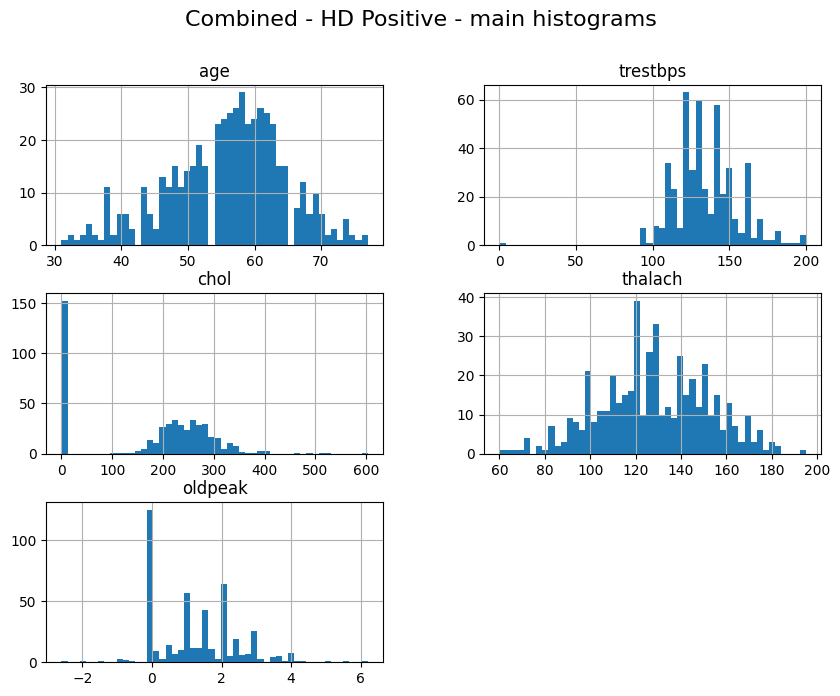

In [ ]:
# main histograms - Combined - HD Positive
combined_with_for_plot[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].astype(float).hist(bins = 50, figsize = (10,7.5))
plt.suptitle("Combined - HD Positive - main histograms", fontsize = 16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

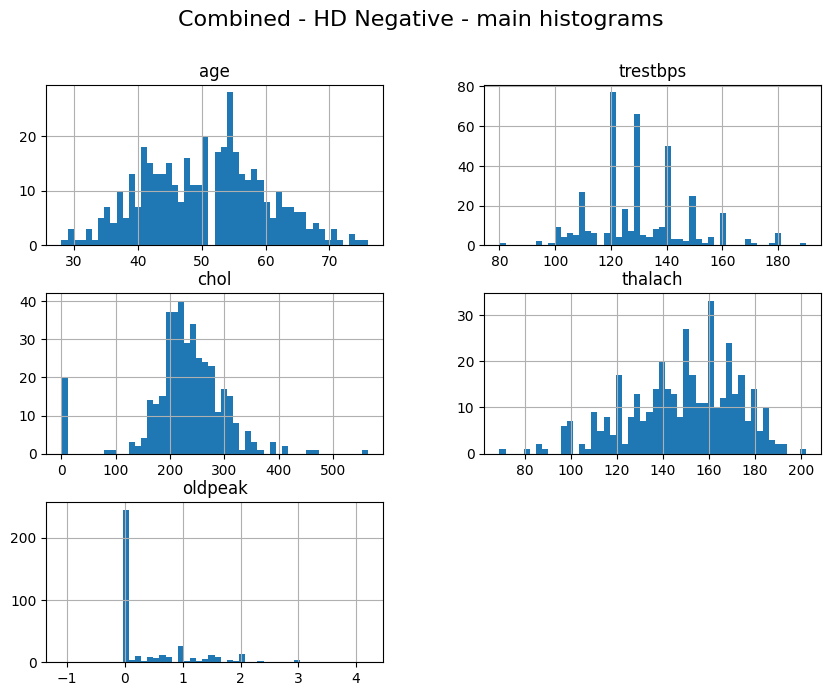

In [ ]:
# main histograms - Combined - HD Negative
combined_wo_for_plot[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].astype(float).hist(bins = 50, figsize = (10,7.5))
plt.suptitle("Combined - HD Negative - main histograms", fontsize = 16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

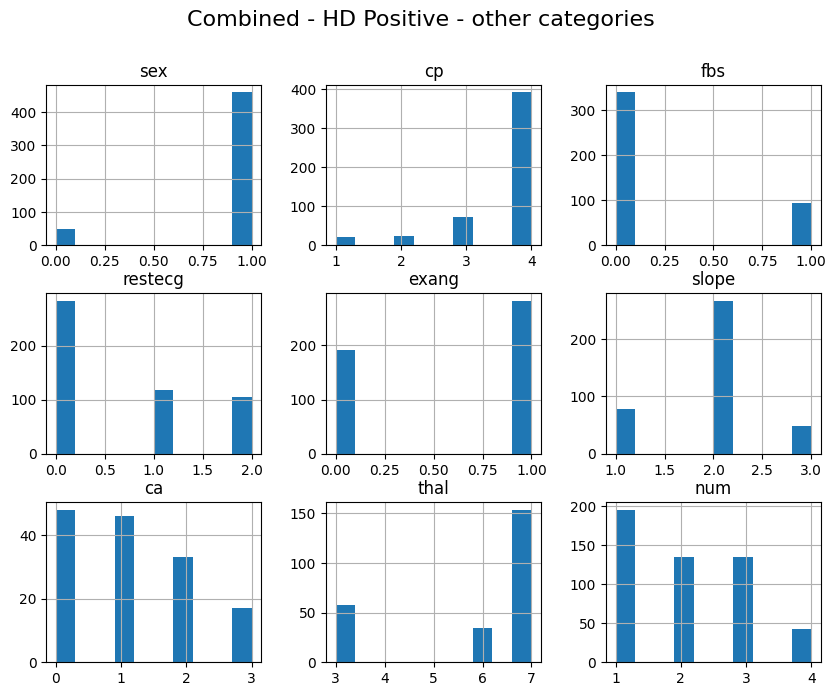

In [ ]:
# look at other categories - Combined - HD Positive
combined_with_for_plot[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']].astype(float).hist(figsize = (10,7.5))
plt.suptitle("Combined - HD Positive - other categories", fontsize = 16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

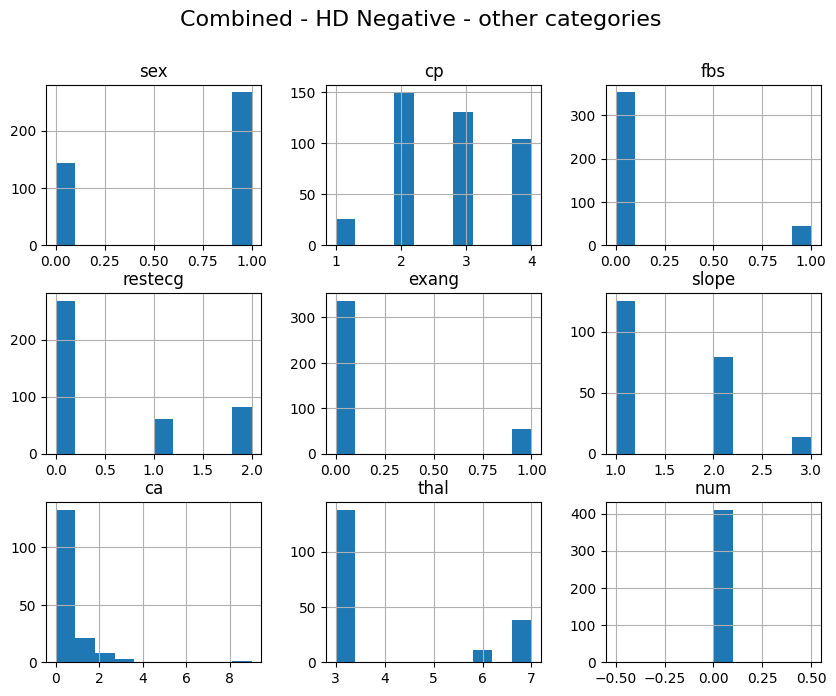

In [ ]:
# look at other categories - Combined - HD Negative
combined_wo_for_plot[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']].astype(float).hist(figsize = (10,7.5))
plt.suptitle("Combined - HD Negative - other categories", fontsize = 16)
plt.show